# Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import spectral


#  Importing the dataset


In [2]:
dataset =sio.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
groundtruth =sio.loadmat('Indian_pines_gt.mat')['indian_pines_gt']


In [3]:
dataset .shape,groundtruth .shape

((145, 145, 200), (145, 145))

In [4]:
n_classes = len(np.unique(groundtruth)) - 1
print("Number of classes: ", n_classes)

Number of classes:  16


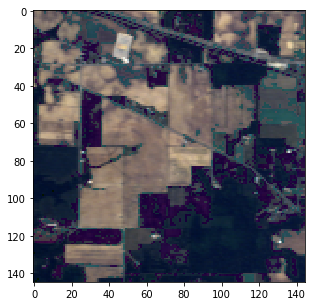

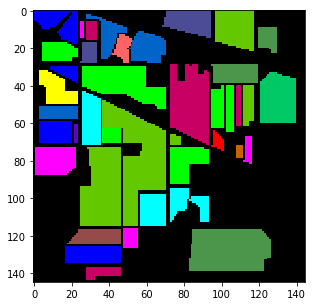

In [5]:
plt.image = spectral.imshow(dataset, bands=(29, 19, 9), figsize = (5,5))
plt.ground_truth = spectral.imshow(classes = groundtruth, figsize = (5,5))







Reshape the Data 

In [6]:

data=np.reshape(dataset,(dataset.shape[0]*dataset.shape[1],dataset.shape[2]))

gt=np.reshape(groundtruth,(groundtruth.shape[0]*groundtruth.shape[1]))

In [7]:
#update_data size
data.shape,gt.shape

((21025, 200), (21025,))

In [8]:
data

array([[3172, 4142, 4506, ..., 1057, 1020, 1020],
       [2580, 4266, 4502, ..., 1064, 1029, 1020],
       [3687, 4266, 4421, ..., 1061, 1030, 1016],
       ...,
       [3153, 3864, 4282, ..., 1003, 1008, 1000],
       [3155, 4104, 4106, ..., 1011, 1005, 1003],
       [3323, 3860, 4197, ..., 1007, 1004, 1000]], dtype=uint16)

In [9]:
gt

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

# Feature Scaling


In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data) 
data= scaler.transform(data)

C:\Users\rirok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rirok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
data

array([[ 0.6047628 ,  0.21997468,  0.8862633 , ...,  1.28472014,
         0.38894136,  1.62910551],
       [-1.06326446,  0.75820528,  0.87074869, ...,  1.62021647,
         1.17937664,  1.62910551],
       [ 2.05583381,  0.75820528,  0.55657785, ...,  1.47643233,
         1.26720278,  1.06179023],
       ...,
       [ 0.55122814, -0.98670358,  0.01744517, ..., -1.30339441,
        -0.66497235, -1.20747086],
       [ 0.55686337,  0.05503305, -0.66519764, ..., -0.91997003,
        -0.92845077, -0.7819844 ],
       [ 1.03022246, -1.00406586, -0.31224028, ..., -1.11168222,
        -1.01627691, -1.20747086]])

In [12]:
Labels,counts=np.unique(gt,return_counts=True)

data=data[gt>0,:]
gt=gt[gt>0]

Labels,counts=np.unique(gt,return_counts=True)


Labels,counts=np.unique(gt,return_counts=True)

In [13]:
data.shape,gt.shape

((10249, 200), (10249,))

Classes of the Indian Pines scene with the number of samples:


In [14]:
Labels,counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=uint8),
 array([  46, 1428,  830,  237,  483,  730,   28,  478,   20,  972, 2455,
         593,  205, 1265,  386,   93], dtype=int64))

# Splitting the dataset into the Training set and Test set


In [15]:
from sklearn.model_selection import train_test_split

# Saving 20% for testing
testRatio=0.20

# Splitting using scikit-learn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(data, gt, test_size=testRatio, random_state=345, stratify=gt)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8199, 200)
(2050, 200)
(8199,)
(2050,)


Applying Scalar to train and test Dataset


In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Apply different Model without hyperparameter tuning

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('GB', GradientBoostingClassifier()))

In [21]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    ypred=model.predict(X_test) 
    scores.append(accuracy_score(y_test, ypred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\rirok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rirok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rirok\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rirok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100

  Name     Score
0   LR  0.825366
1  GNB  0.458049
2  SGD  0.680976
3  KNN  0.774146
4   DT  0.750732
5   RF  0.852683
6  SVC  0.811220
7   GB  0.856098


 # Fitting Support Vector Machines (SVM) to the Training set with  tuning



In [22]:
#Appplying SVM 

from sklearn.svm import SVC

clf = SVC(C=10,gamma=0.01)

clf.fit(X_train, y_train)



SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# Predicting the Test set results

y_pred=clf.predict(X_test) 
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_pred)

In [24]:
#The Results
acc

0.9248780487804878

In [25]:

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test,y_pred))

0.91432356869882


In [26]:
y_jj=clf.predict(X_train) 

from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_train,y_jj))

0.9612940096176317


# Making the Confusion Matrix


In [27]:
                           indianpines_class_names = [
                           'alfalfa',           'corn-notill',               'corn-min',               'corn',
                           'grass/pasture',     'grass/trees',    'grass/pasture-mowed',      'hay-windrowed',
'oats',          'soybeans-notill',           'soybeans-min',      'soybean-clean',
                           'wheat',                   'woods', 'bldg-grass-tree-drives', 'stone-steel towers']

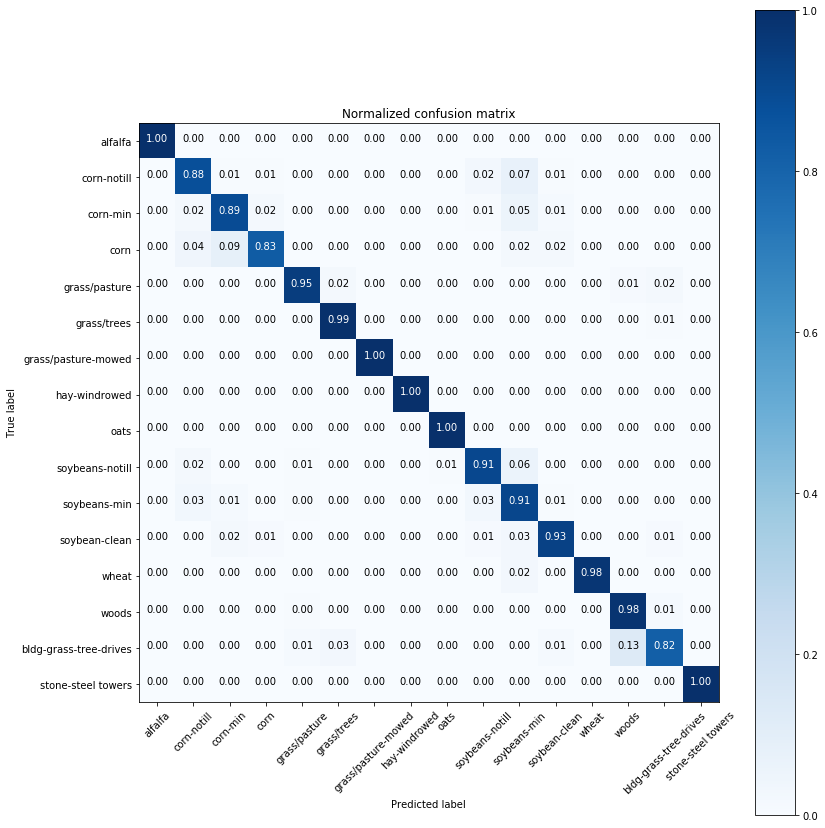

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the results
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plot normalized confusion matrix
plt.figure(figsize=(12, 12))
plot_confusion_matrix(cm, classes=indianpines_class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [29]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred,target_names=indianpines_class_names)


In [30]:
print(cr)

                        precision    recall  f1-score   support

               alfalfa       1.00      1.00      1.00         9
           corn-notill       0.92      0.88      0.90       286
              corn-min       0.91      0.89      0.90       166
                  corn       0.87      0.83      0.85        47
         grass/pasture       0.95      0.95      0.95        97
           grass/trees       0.97      0.99      0.98       146
   grass/pasture-mowed       0.83      1.00      0.91         5
         hay-windrowed       1.00      1.00      1.00        96
                  oats       0.80      1.00      0.89         4
       soybeans-notill       0.88      0.91      0.89       194
          soybeans-min       0.91      0.91      0.91       491
         soybean-clean       0.93      0.93      0.93       119
                 wheat       1.00      0.98      0.99        41
                 woods       0.96      0.98      0.97       253
bldg-grass-tree-drives       0.89      

In [31]:
from sklearn.model_selection import GridSearchCV


In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_N = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf_N.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
